# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Load dataset
df = pd.read_csv('/content/Dataset_clustering.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Customer_ID,total_spending,order_frequency,Region,Alcoholic Beverages_pct,Juices_pct,Soft Drinks_pct,Water_pct,discount_sensitivity,Customer_Type_B2C,Cluster
0,CUS9293,40508.50,269.0,Bremen,0.804756,0.092382,0.066686,0.036176,0.0,True,3
1,CUS9294,41004.07,295.0,Niedersachsen,0.744691,0.142344,0.071944,0.041021,0.0,True,3
2,CUS9295,44858.02,276.0,Hamburg,0.809766,0.104237,0.053630,0.032366,0.0,True,3
3,CUS9296,50058.01,311.0,Hessen,0.812679,0.094151,0.054911,0.038259,0.0,True,1
4,CUS9297,35826.45,273.0,Nordrhein-Westfalen,0.775824,0.114477,0.063377,0.046322,0.0,True,3


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
X = df.drop(columns=['Cluster', 'Customer_ID', 'Region', 'Customer_Type_B2C'])

y = df['Cluster']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
model = RandomForestClassifier(random_state=112)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=112)

algoritma random forest yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi prediksi dan mengurangi risiko overfitting karena jumlah antar klaster tidak seimbang, mengingat data hasil clustering. Tidak ada optimalisasi parameter diawal membangun model karena akan dilakuakn bayesian optimization untuk langsung mendapat hasil yang optimal.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Tune hyperparameters using the validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.5f}")

# Evaluate the final model on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.5f}")

Validation Accuracy: 0.99700
Test Accuracy: 0.99750


In [ ]:
# Predict on the test set
y_test_pred = model.predict(X_test)

evaluation_metrics = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred, average='weighted'),
    'Recall': recall_score(y_test, y_test_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_test_pred, average='weighted')
}

for metric, value in evaluation_metrics.items():
    print(f"{metric}:")
    print(value)
    print()

Accuracy:
0.9975

Precision:
0.9975301932367149

Recall:
0.9975

F1-Score:
0.9974984164877967



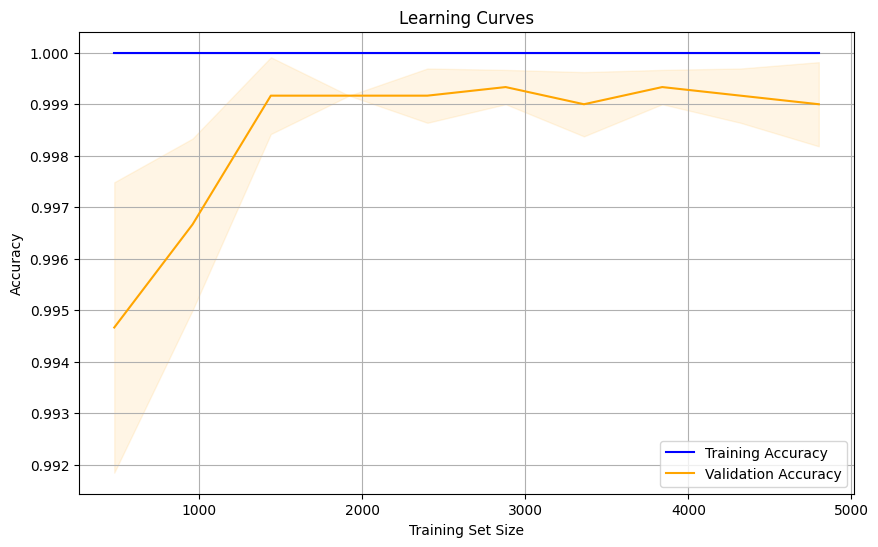

In [ ]:
# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='orange')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='orange')
plt.title("Learning Curves")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid(True)
plt.show()

Accuracy:
0.9975

Precision:
0.9975301932367149

Recall:
0.9975

F1-Score:
0.9974984164877967


Hasil evaluasi metrik menunjukan hasil ayng sangat baik, model rf mampu mempelajari pola sehingga dapat menghasilkan prediksi yang akurat. ini disebabkan model menerima banyak data training namun perlu dipikirkan untuk waktu komputasi.

Random dipilih karena kelebihannya yang memberikan
1. Akurasi Tinggi
2. Robust terhadap Overfitting
3. Kemampuan Menangani Data Tidak Seimbang: terdapat 5 kluster dengan jumlah yang berbeda beda.
4. Memberikan efek yang signifikan pada dataset yang besar

namun memberikan kekurangan
Kebutuhan Memori yang Tinggi,
Interpretabilitas yang Rendah,
Lambat pada Prediksi,
Waktu Pelatihan yang Lama

sehingga jika ingi menggunakna rf dengan dataset yang besar, gunakan GPU

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
param_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(10, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'max_features': Categorical(['sqrt', 'log2'])
}


In [ ]:
model = RandomForestClassifier(random_state=42)

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=112,
    n_jobs=-1
)


bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_jobs=-1, random_state=112, scoring='accuracy',
              search_spaces={'max_depth': Integer(low=10, high=50, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize')})

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
best_model = bayes_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# classification report
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# accuracy score
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.5f}")

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       409
           1       1.00      1.00      1.00       583
           2       1.00      0.99      0.99       343
           3       1.00      1.00      1.00       665

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Tuned Model Accuracy: 0.99750


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

1. Tuning menggunakan bayesion optimization dipilih karena dataset besar. sebenarnya tidak perlu dilakukan optimasi karena model sudah melakukan klasifikasi dengan baik namun untuk meningkatkan performa model menjadi sempurna dipilih bayesian optimization.

2. Model sudah bagus. Tidak mengalami overfitting atau underfitting

3. Gunakan model yang lebih modern